# Boston Crime Report
This is the Exploratory data analysis of the Boston Crime Report. 

Our target for this EDA is to understand the crime rate in the districts of Boston and find out a pattern in them if possible.

We will address this dataset with 3 questions in mind.

#### Q1 What time do the crimes occur in Boston?

#### Q2 What crimes are most frequently committed?

#### Q3 In which areas are these committed?

Using these observations we will try to decode a pattern in the areas for the BPD to patrol and maintain. 

## Required modules and packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
df = pd.read_csv("/Users/loq/Desktop/college/project personal/Data Science/data/crime.csv", encoding="latin1")

## Data Cleaning 

Now we will apply data scrubbing i.e. data cleaning. To do that we will understand the data types 

In [2]:
df.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

We have 3 types of data here
1. Object
2. int64
3. float64


#### Removing the camelcase 

In [3]:
newcol = {"INCIDENT_NUMBER": "in_no", 
          "OFFENSE_CODE":"offcode", 
          "OFFENSE_CODE_GROUP":"group", 
          "OFFENSE_DESCRIPTION":"desc", 
         "DISTRICT":"district",
         "REPORTING_AREA":"area",
         "SHOOTING":"shooting",
         "OCCURRED_ON_DATE":"date",
         "YEAR":"year",
         "MONTH":"month",
         "HOUR":"hr",
         "DAY_OF_WEEK":"day",
         "UCR_PART":"UCR",
         "STREET":"street"}
df = df.rename(columns=newcol)
df

,in_no,offcode,group,desc,district,area,shooting,date,year,month,day,hr,UCR,street,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


#### 

In [4]:
df.describe(include = "all")

,in_no,offcode,group,desc,district,area,shooting,date,year,month,day,hr,UCR,street,Lat,Long,Location
count,319073,319073.000000,319073,319073,317308,319073,1019,319073,319073.000000,319073.000000,319073,319073.000000,318983,308202,299074.000000,299074.000000,319073
unique,282517,NaN,67,244,12,879,1,233229,NaN,NaN,7,NaN,4,4657,NaN,NaN,18194
top,I162030584,NaN,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,2017-06-01 00:00:00,NaN,NaN,Friday,NaN,Part Three,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
freq,13,NaN,37132,18783,49945,20250,1019,29,NaN,NaN,48495,NaN,158553,14194,NaN,NaN,19999
mean,NaN,2317.546956,NaN,NaN,NaN,NaN,NaN,NaN,2016.560586,6.609719,NaN,13.118205,NaN,NaN,42.214381,-70.908272,NaN
std,NaN,1185.285543,NaN,NaN,NaN,NaN,NaN,NaN,0.996344,3.273691,NaN,6.294205,NaN,NaN,2.159766,3.493618,NaN
min,NaN,111.000000,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000,1.000000,NaN,0.000000,NaN,NaN,-1.000000,-71.178674,NaN
25%,NaN,1001.000000,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,4.000000,NaN,9.000000,NaN,NaN,42.297442,-71.097135,NaN
50%,NaN,2907.000000,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,7.000000,NaN,14.000000,NaN,NaN,42.325538,-71.077524,NaN
75%,NaN,3201.000000,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,9.000000,NaN,18.000000,NaN,NaN,42.348624,-71.062467,NaN


In [5]:
#first values of data set
df.loc[1]

in_no                        I182070943
offcode                            1402
group                         Vandalism
desc                          VANDALISM
district                            C11
area                                347
shooting                            NaN
date                2018-08-21 00:00:00
year                               2018
month                                 8
day                             Tuesday
hr                                    0
UCR                            Part Two
street                         HECLA ST
Lat                           42.306821
Long                           -71.0603
Location    (42.30682138, -71.06030035)
Name: 1, dtype: object

In [6]:
#to understand the range of dataset that we want to work on
print(df.date.min())
print(df.date.max())

2015-06-15 00:00:00
2018-09-03 21:25:00


Since we have more than 6 months missing in the year of 2015 we will drop the year and neglect the last 3 months of 2018 to get better prediction on our data 

In [7]:
df = df[df["year"].isin([2016,2017,2018])]
df.year.value_counts(dropna=False)

year
2017    100886
2016     99114
2018     65685
Name: count, dtype: int64

### Finding out the missing values

In [8]:
#finding out the missing values
df.isnull().sum()

in_no            0
offcode          0
group            0
desc             0
district      1637
area             0
shooting    264851
date             0
year             0
month            0
day              0
hr               0
UCR             89
street        9589
Lat          17818
Long         17818
Location         0
dtype: int64

We have our first task set which is to clear out the missing values. We have identified columns with missing values that are "district shooting street lat long and ucr_part"

In [9]:
# removing the missing values
df.fillna({"shooting":"N"},inplace=True)
print(df.shooting.unique())
df.fillna({"district":"-"}, inplace = True)
print(df.district.unique())
df.fillna({"UCR":"Unkown"}, inplace=True)
print(df.UCR.unique())

C:\Users\loq\AppData\Local\Temp\ipykernel_16304\3085977959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({"shooting":"N"},inplace=True)
C:\Users\loq\AppData\Local\Temp\ipykernel_16304\3085977959.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({"district":"-"}, inplace = True)
C:\Users\loq\AppData\Local\Temp\ipykernel_16304\3085977959.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({"UCR":"Unk

['N' 'Y']
['D14' 'C11' 'D4' 'B3' 'B2' 'C6' '-' 'A1' 'E5' 'A7' 'E13' 'E18' 'A15']
['Part One' 'Part Two' 'Part Three' 'Other' 'Unkown']


In [10]:
#filling the missing values of Lat and Long from Location
df[['Lat', 'Long']] = df['Location'].str.extract(
    r'\(?\s*([-\d\.]+)\s*,\s*([-\d\.]+)\s*\)?'
).astype(float)

C:\Users\loq\AppData\Local\Temp\ipykernel_16304\3943066777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Lat', 'Long']] = df['Location'].str.extract(


Now that we have dealt with missing values it is time for duplicate values

We will find the duplicate value in a unique column or a primary key column which is incident number 

### Finding out the duplicate values

In [11]:
#finding out the duplicate values
df.in_no.value_counts()

in_no
I162030584       13
I182065208       10
I172013170       10
I172096394       10
I162071327        9
                 ..
I172079168        1
I172079167        1
I172079166        1
I172079165        1
I010370257-00     1
Name: count, Length: 235564, dtype: int64

In [12]:
df.shape

(265685, 17)

As we see there are multiple duplicate values in incident number so we analyse which ones to keep and drop the rest

since wee see the duplicate data is 12% we will drop the duplicate values except the first one 

In [13]:
df.drop_duplicates(subset = "in_no", inplace = True)

C:\Users\loq\AppData\Local\Temp\ipykernel_16304\4103426983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset = "in_no", inplace = True)


In [14]:
df.shape

(235564, 17)

## Analysis and Visualization

### Q1 What time are the crimes committed most

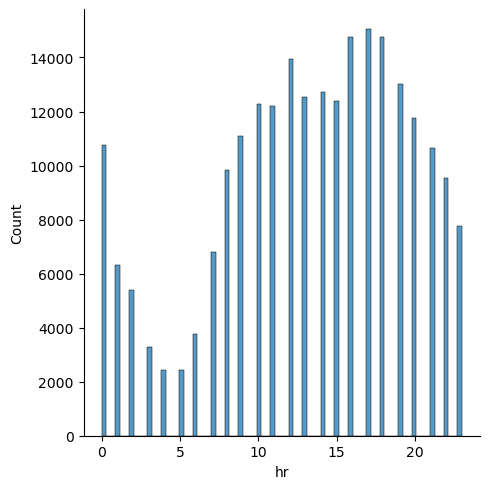

In [15]:
# time at which crimes occur frequently
sns.displot(df["hr"], legend = True)

the above plot gives us a basic idea of distribution of crime which is the crime rate increases between 15:00 to 20:00 but to get the specific time period we will find out the categrical plot

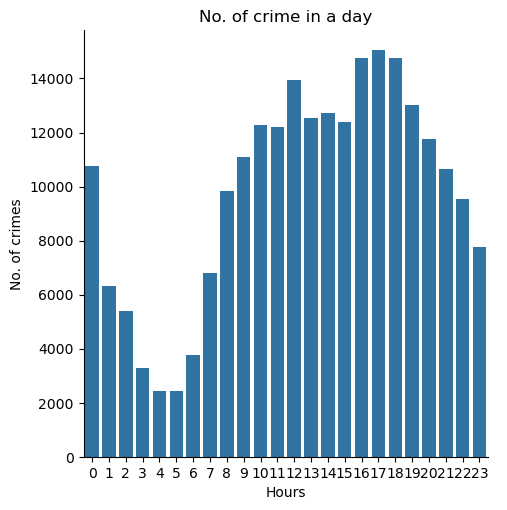

In [16]:
sns.catplot(x = "hr", data = df, kind = "count")
plt.xticks(size = 10)
plt.xlabel("Hours")
plt.ylabel("No. of crimes")
plt.title("No. of crime in a day")
plt.show()

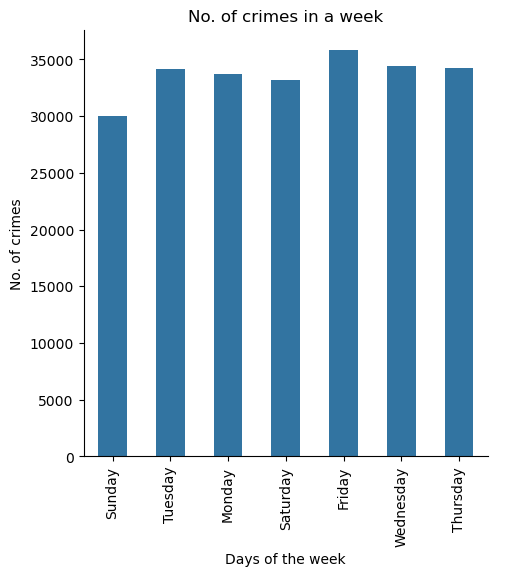

In [17]:
sns.catplot(x = "day", data = df, kind = "count", width = .5)
plt.xticks(size = 10, rotation = 90)
plt.xlabel("Days of the week")
plt.ylabel("No. of crimes")
plt.title("No. of crimes in a week")
plt.show()

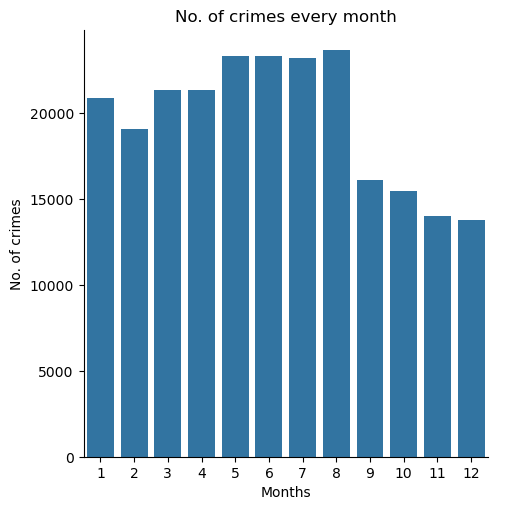

In [18]:
sns.catplot(x = "month", data = df, kind = "count")
plt.xticks(size = 10)
plt.xlabel("Months")
plt.ylabel("No. of crimes")
plt.title("No. of crimes every month")
plt.show()

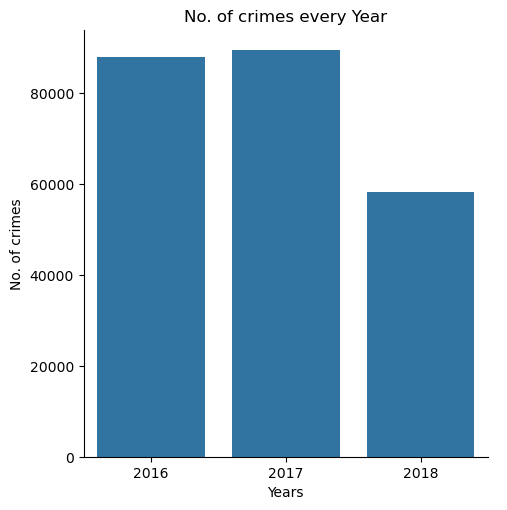

In [19]:
sns.catplot(x = "year", data = df, kind = "count")
plt.xticks(size = 10)
plt.xlabel("Years")
plt.ylabel("No. of crimes")
plt.title("No. of crimes every Year")
plt.show()

From the above mentioned graphs we have understood the crime rate peak at 17:00 and the it is high during 16:00-19:00hrs of the day. Whereas crime rate is high in the middle of week from Wednesday to Friday with the highest being on Friday. Comparitively the crime rate is lower on weekends, significantly on Sunday.
It can be observed that crime rate is high during the months of May to August, where it is at its peak in August and sees a significant drop during winter season starting from September.
The Year 2017 has the highest frequncy of crime

### Q2 What type of crimes are committed the most

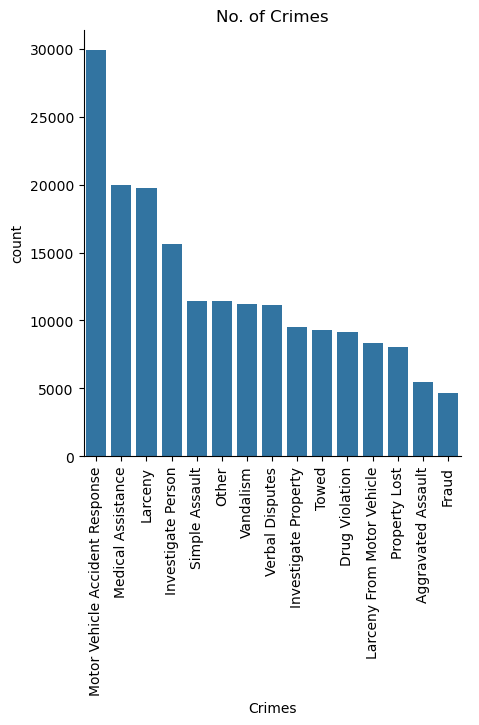

In [20]:
#categories this by selecting the top 15 crimes and then 
top_crimes = df["group"].value_counts().head(15).index
sns.catplot(x = "group", order= top_crimes, data = df, kind= "count")
plt.xticks(rotation = 90)
plt.xlabel("Crimes")
plt.title("No. of Crimes")
plt.ylabel("count")
plt.show()

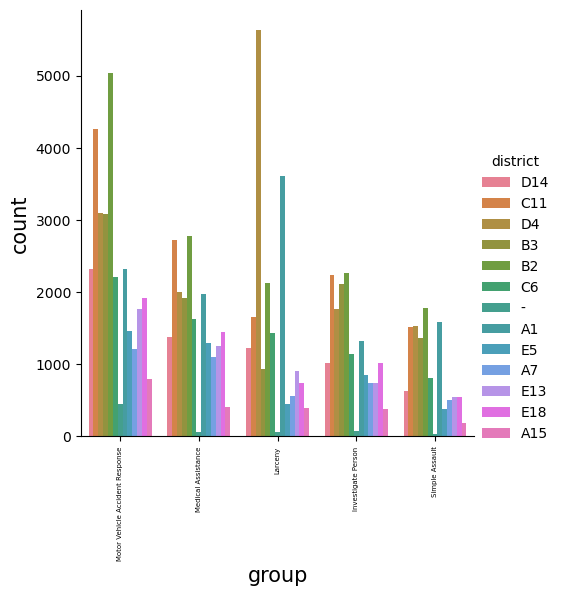

In [21]:
#top5_crimes = top_crimes.head(5)
sns.catplot(data=df, x="group", order = top_crimes[:5], hue= "district", kind = "count", aspect = 1)
plt.xticks(rotation = 90, size = 5)
plt.xlabel("group",size = 15)
plt.ylabel("count", size = 15)
plt.show()

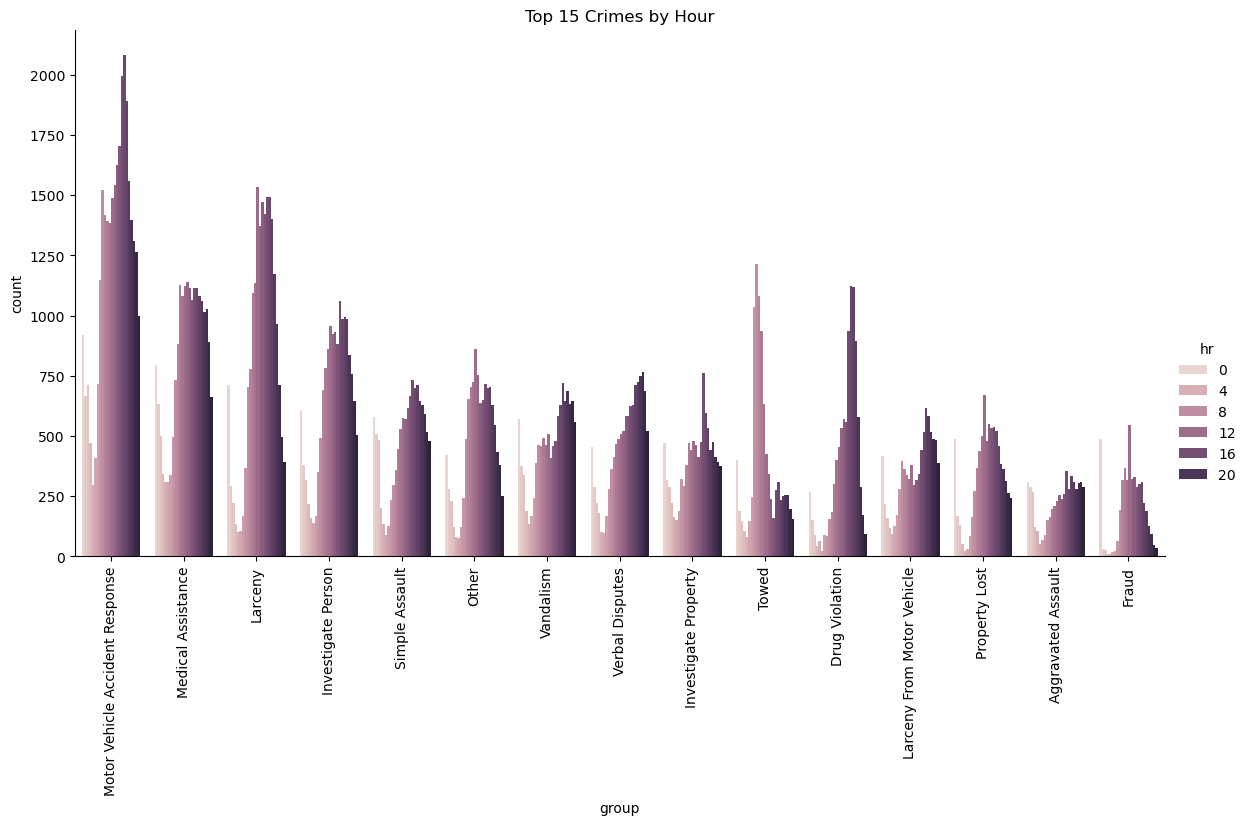

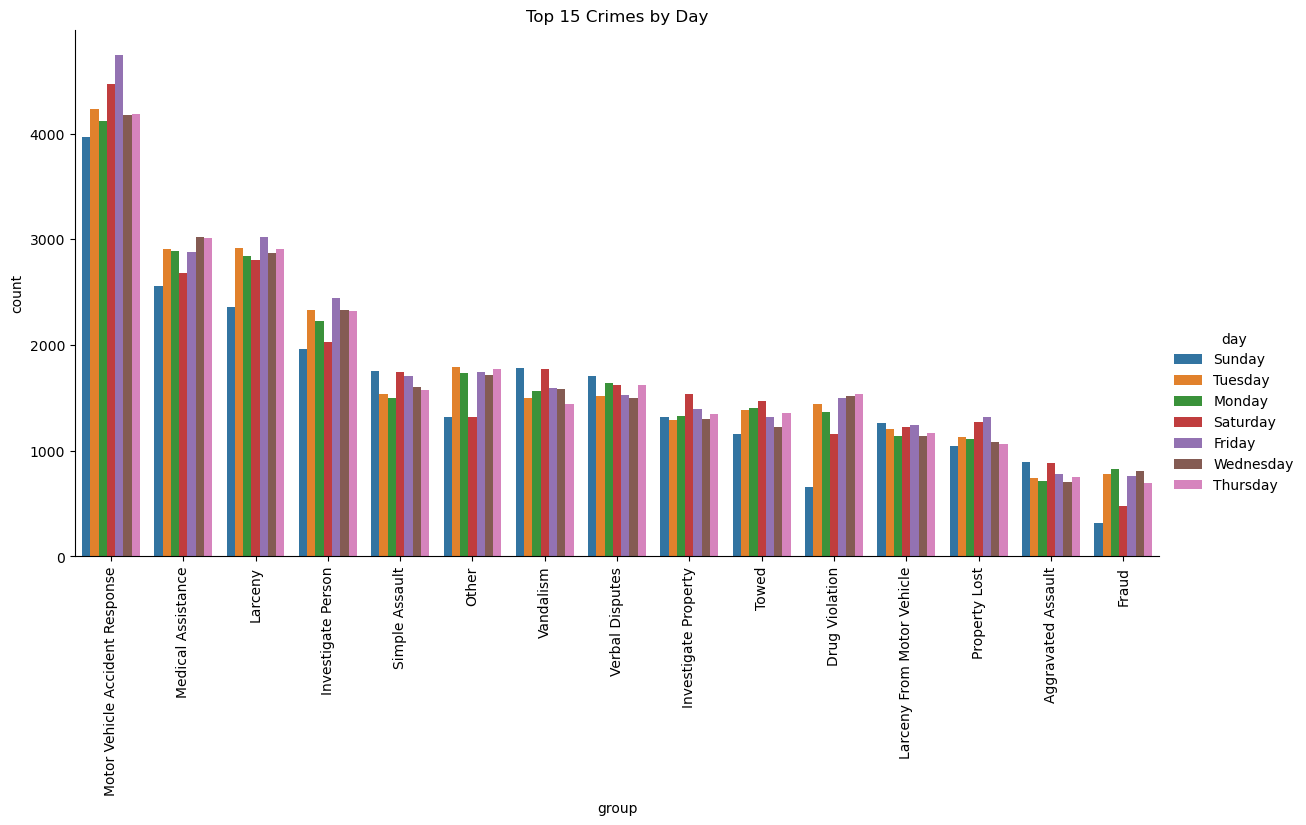

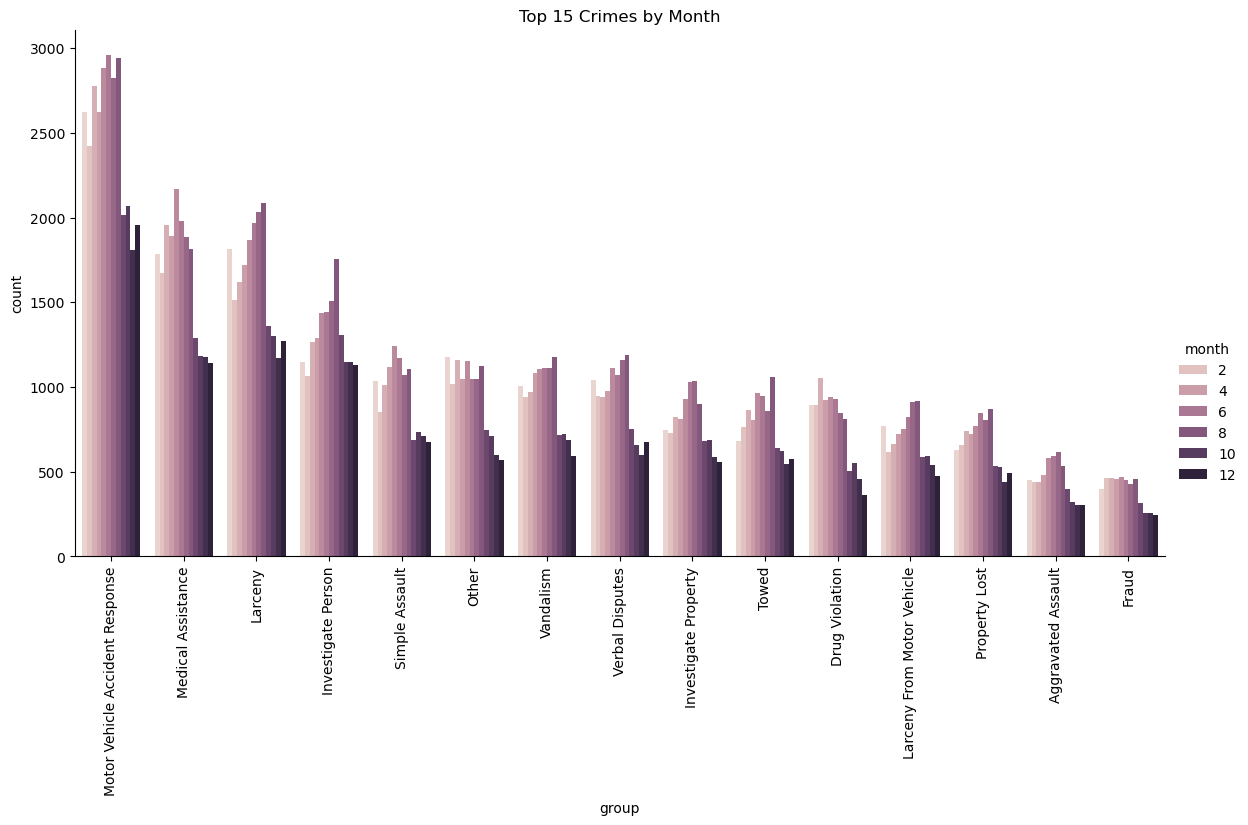

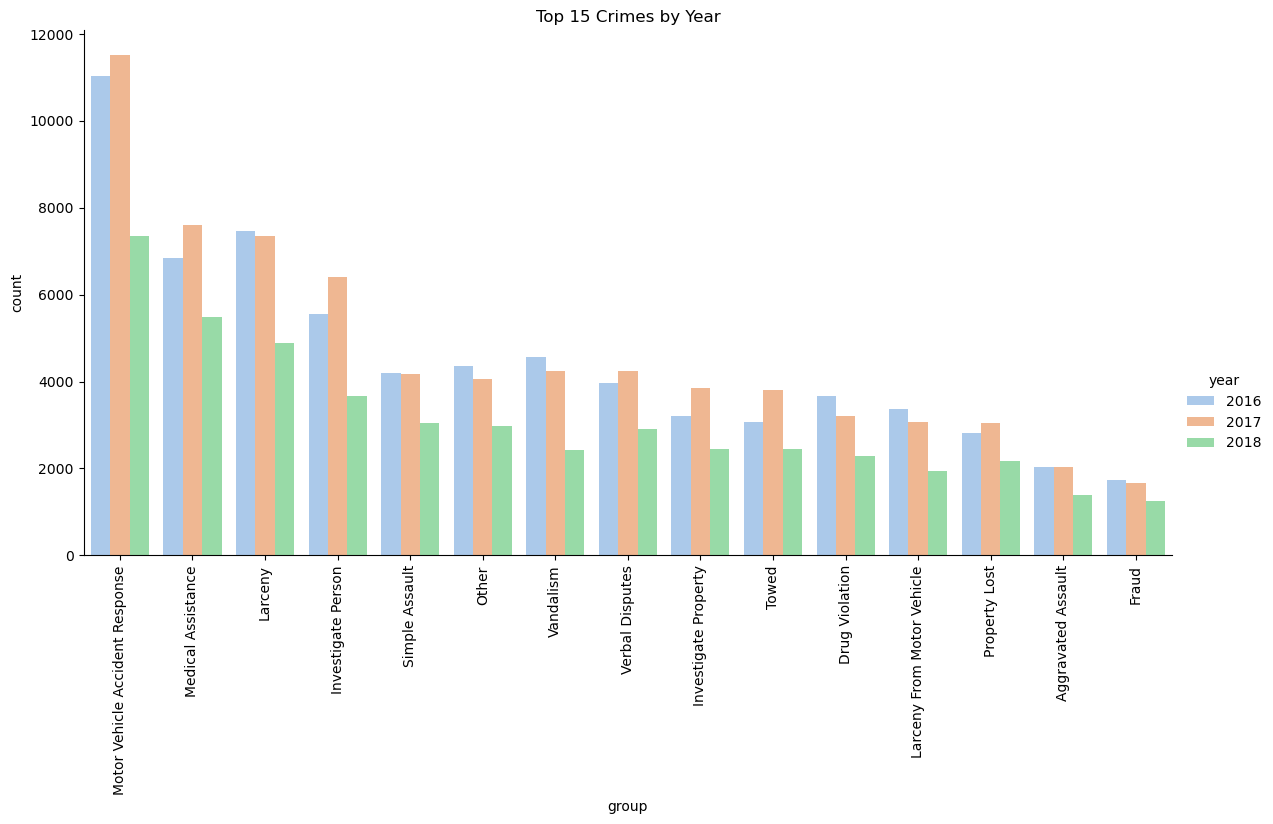

In [27]:
# Hourly distribution
sns.catplot(x="group", data=df, order=top_crimes, kind="count", hue="hr", height=6, aspect=2)
plt.xticks(rotation = 90)
plt.title("Top 15 Crimes by Hour")

#daily distribution
sns.catplot(x="group", data=df, order=top_crimes, kind="count", hue="day", height=6, aspect=2)
plt.xticks(rotation = 90)
plt.title("Top 15 Crimes by Day")

#Montly distribution
sns.catplot(x="group", data=df, order=top_crimes, kind="count", hue="month", height=6, aspect=2)
plt.xticks(rotation = 90)
plt.title("Top 15 Crimes by Month")

#Yearly distribution
sns.catplot(x="group", data=df, order=top_crimes, kind="count", hue="year", height=6, aspect=2, palette = "pastel")
plt.xticks(rotation = 90)
plt.title("Top 15 Crimes by Year")

plt.show()

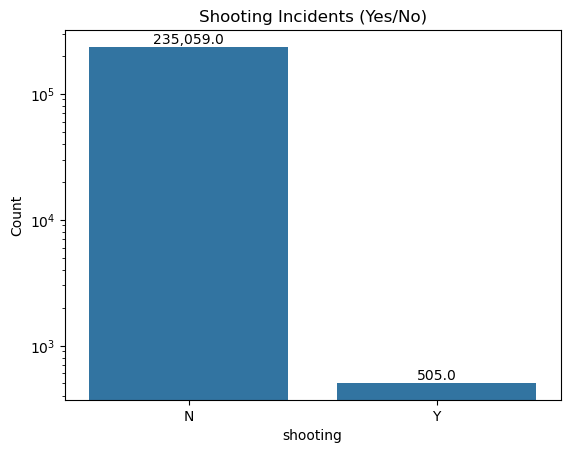

In [23]:
ax = sns.countplot(x="shooting", data= df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
plt.title("Shooting Incidents (Yes/No)")
plt.xlabel("shooting")
plt.ylabel("Count")
plt.yscale("log")
plt.show()

### Q3 In which areas are these committed?

district
B2     35905
C11    30977
D4     30312
B3     26224
A1     25881
C6     17597
D14    15556
E18    13284
E13    13171
A7     10162
E5      9980
A15     5041
-       1474
Name: count, dtype: int64


<Axes: xlabel='district', ylabel='count'>

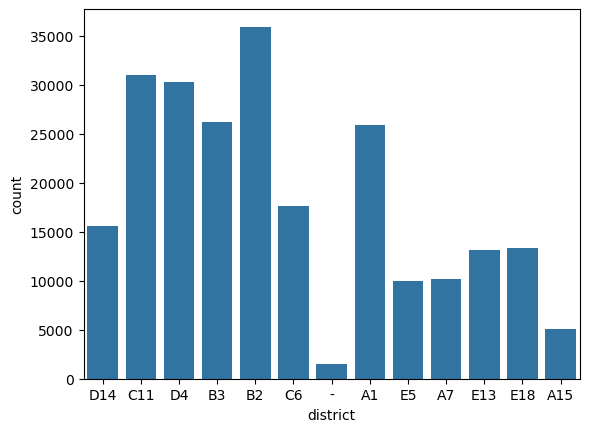

In [24]:
#to see the exact frequency of crimes in each district
print(df.district.value_counts())
#district vs no. of crimes
sns.countplot(data = df,
             x = "district")

We observe District A15 has the lowest crime rate and B2 has the highest 

<Axes: xlabel='district', ylabel='count'>

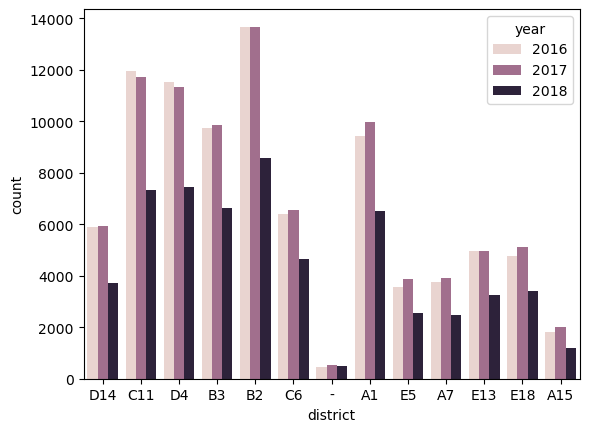

In [25]:
sns.countplot(data = df, x= "district", hue = "year")

<Axes: xlabel='year', ylabel='count'>

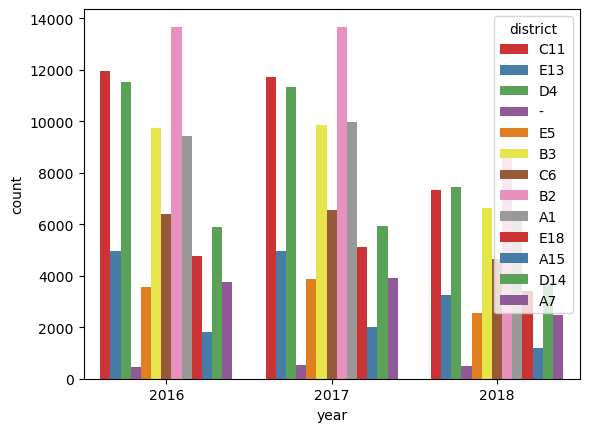

In [26]:
sns.countplot(data= df, x = "year", hue = "district", palette = "Set1")

### Conclusion
Through this EDA we have come to understand the highest number of crime is committed in B2 District followed by C1 and D4 respectivey. We can observe that crime rate peaks in the middle of the day and the week contrary to the logical assumption of it being at peak during night time of weekends. It has been observed that crime rate is maximum during the mid year indicating summer to be the best time for a crime. The most committed crime was Larceny followed by simple assault and vandalism. Through this analysis we can predict a pattern in the crime rate and therefore would provide suggestions like patrolling should be increased during the summer with it frequent patrolling done in higher crime areas in the evening from 4-8pm. This would help us allocate police personnel more efficiently and save resources at the same time. The highest number of records indicate Motorised Vehicle assistance and medical assistance. Therefore the government can allocate more personnel on highways and accident prone to improve assistance and save more lives while keeping the neighborhood safe.